In [1]:
import os,sys
import numpy as np
import cv2
from imageio.v2 import imread
from PIL import Image
import scipy
from scipy.signal import convolve2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import color
import matplotlib.pyplot as plt

In [2]:
"""
• 'L' (8-bit pixels, grayscale)
• 'P' (8-bit pixels, mapped to any other mode using a color palette)
• 'RGB' (3x8-bit pixels, true color)
• 'RGBA' (4x8-bit pixels, true color with transparency mask)
• 'CMYK' (4x8-bit pixels, color separation)
• 'YCbCr' (3x8-bit pixels, color video format)
• 'I' (32-bit signed integer pixels)
• 'F' (32-bit floating point pixels)
"""

def access():
    PathImg = "./imagens/"
    lstFilesImg = []
    for dirName, subdirList, fileList in os.walk(PathImg):
        for filename in fileList:
            lstFilesImg.append(os.path.join(dirName,filename))

    print("Lista de imagens: ")
    print(lstFilesImg)

    img=imread(lstFilesImg[0],pilmode='RGB')
    print("Dimensões 1ª imagem: ", img.shape)

    width=512
    height=512
    aspect_ratio = 1

    imglist=[]
    for file in lstFilesImg:
        img=imread(file,pilmode='RGB')
        img=np.array(Image.fromarray(img).resize((width,int(height* aspect_ratio))))
        imglist.append(img)
    Imagens = np.asarray(imglist,dtype=np.uint8)
    print("Após resize: ", Imagens.shape)
    return Imagens

Imagens = access()

Lista de imagens: 
['./imagens/8.0001.jpg', './imagens/histologica.jpg', './imagens/ISIC_0013411.jpg', './imagens/pe_diabetico005.jpg']
Dimensões 1ª imagem:  (881, 1081, 3)
Após resize:  (4, 512, 512, 3)


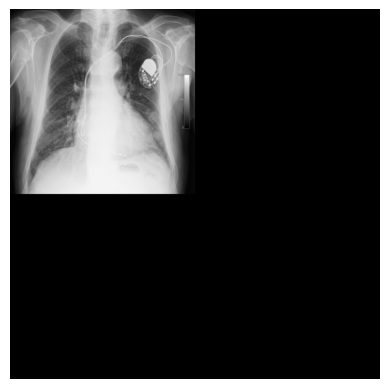

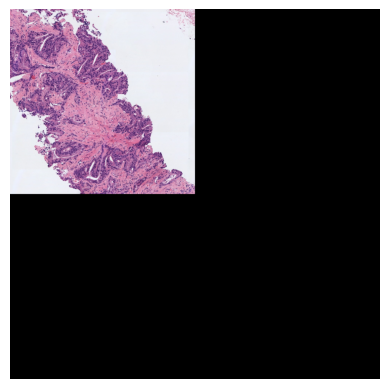

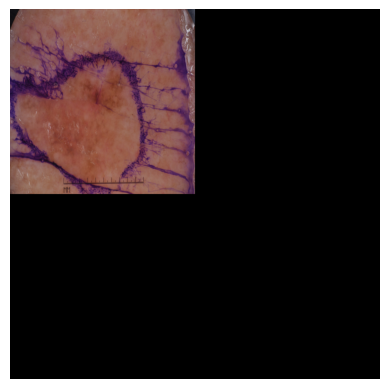

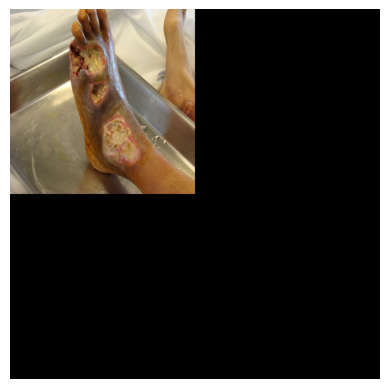

In [3]:
def identity(Imagens, width, height):
    transform_matrix = np.array([
        [1,0,0],
        [0,1,0],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        # para gravar num ficheiro:
        # plt.savefig(str(x) + '.png',bbox_inches='tight')
        plt.show()

identity(Imagens, 1024, 1024)

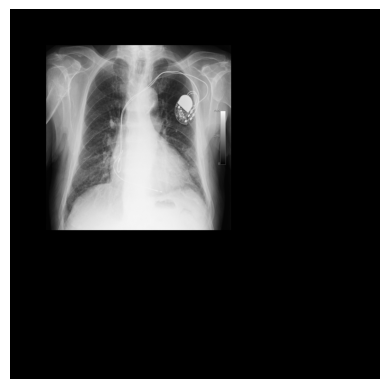

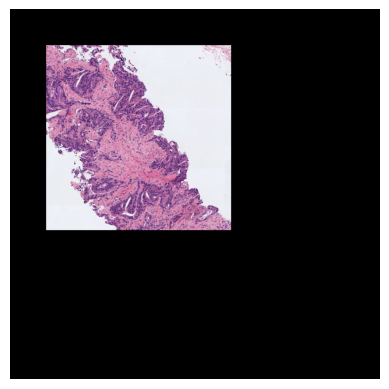

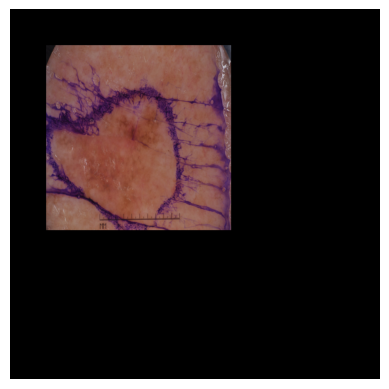

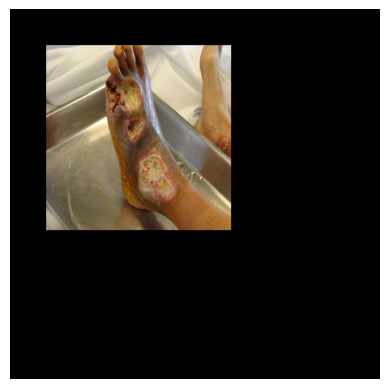

In [4]:
def translation(Imagens, width, height):
    transform_matrix = np.array([
        [1,0,100],
        [0,1,100],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

translation(Imagens, 1024, 1024)

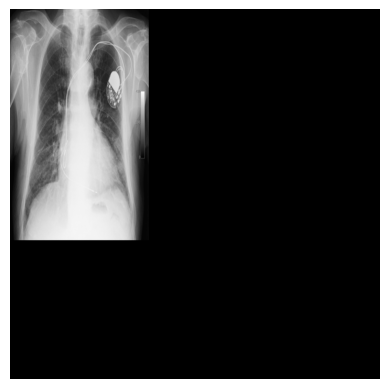

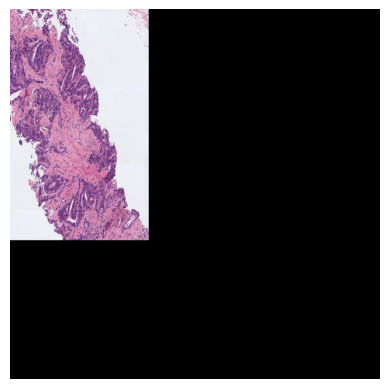

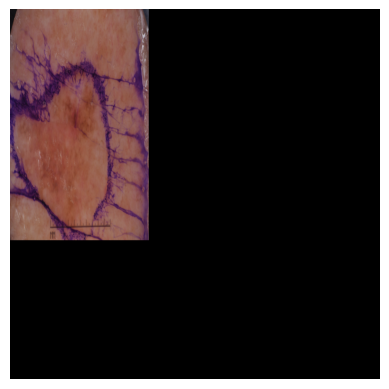

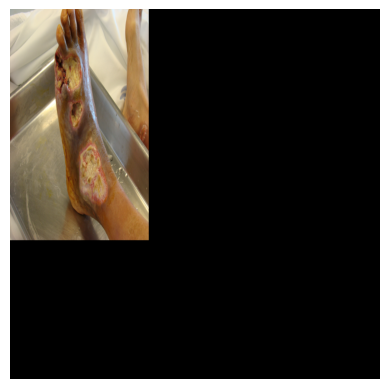

In [5]:
def scaling(Imagens, width, height):
    transform_matrix = np.array([
        [0.75,0,0],
        [0,1.25,0],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

scaling(Imagens, 1024, 1024)

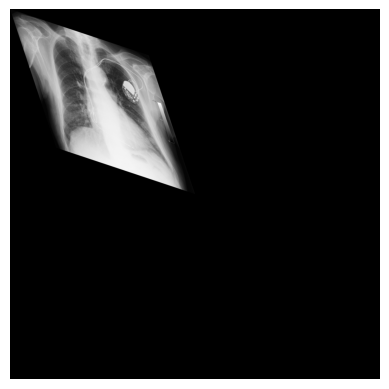

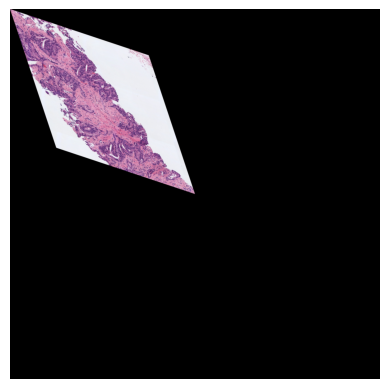

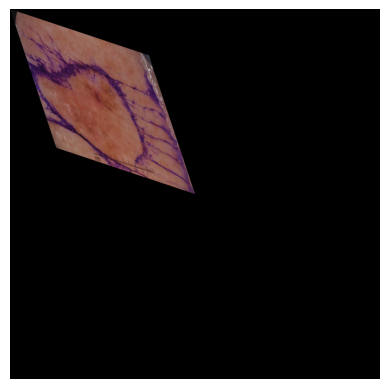

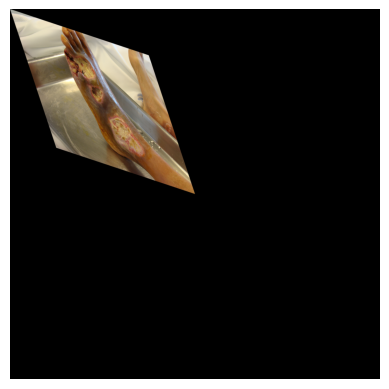

In [6]:
def shearing(Imagens, width, height):
    transform_matrix = np.array([
    [0.75,0.25,0],
    [0.25,0.75,0],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

shearing(Imagens, 1024, 1024)

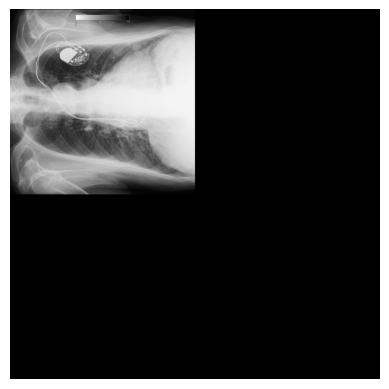

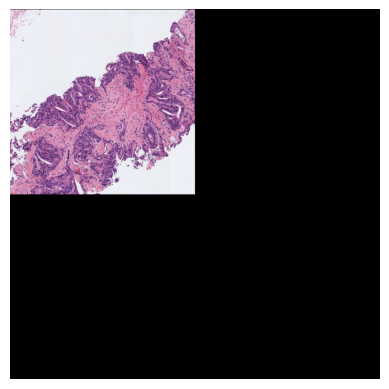

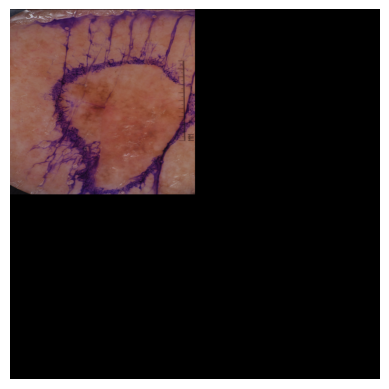

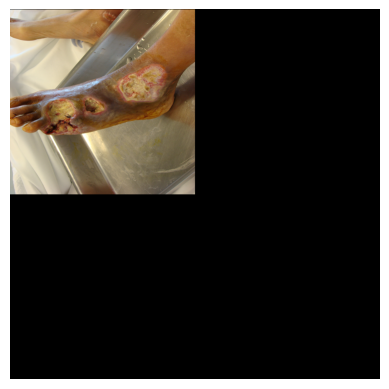

In [7]:
def rotation(Imagens, width, height):
    transform_matrix = np.array([
        [np.cos(np.pi/2),np.sin(np.pi/2), (1-np.cos(np.pi/2))*256-np.sin(np.pi/2)*256 ],
        [-np.sin(np.pi/2),np.cos(np.pi/2),np.sin(np.pi/2)*256+(1-np.cos(np.pi/2))*256 ],
    ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpAffine(Imagens[x,:,:],transform_matrix,(width,height))
        
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

rotation(Imagens, 1024, 1024)

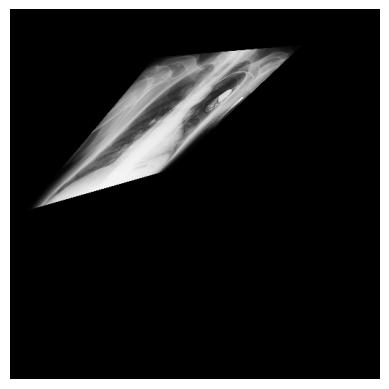

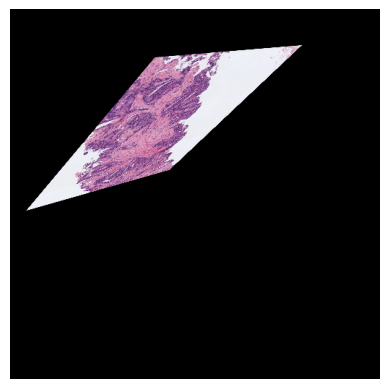

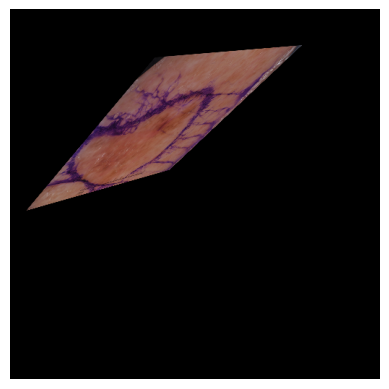

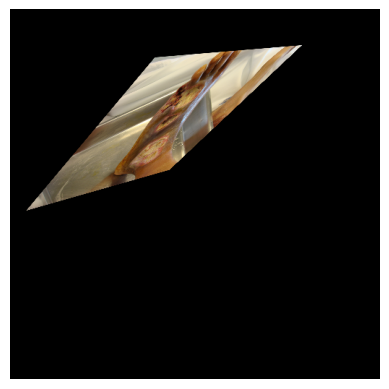

In [8]:
def homogeneous(Imagens, width, height):
    transform_matrix = np.array([
        [1,-1/2,300 ],
        [0,0.9,100],
        [0.001,0.001,1.5],
        ]).astype(np.float32)

    for x in range(len(Imagens)):
        temp = cv2.warpPerspective(Imagens[x,:,:],transform_matrix,(512,512))
        
        plt.axis('off')
        plt.imshow(temp,cmap='gray')
        plt.show()

homogeneous(Imagens, 1024, 1024)